#### CIE4604 Simulation and Visualization
# Assignment 1 - Random Walk and Colored Noise

In this assignment you will simulate and analyse two random processes (time-series):  a random walk process and a colored noise process.  The colored noise process is very important for simulating measurement errors that are correlated in time. Colored noise is frequently encountered in remote sensing sensors as well as in many physical processes.

**Maxwell Lindsay** 5243610

## Part I - Random Walk

> A random-walk process is generated using the recursive formula
>
> $x_k = x_{k-1} + w_k \ \ \ \ \ w_k \sim N(0,q_k = q \Delta t)$
>
> with $w_k$ normal distributed Gaussian noise with variance $q_k = q \cdot \Delta t$. The variance $q_k$ is a function of the the power spectral density $q$ and sample interval $\Delta t = t_k - t_{k-1}$. The main attraction of working with the power spectral density is that the behaviour of the random-walk process does not depend on the chosen sample interval. In our simulations we will choose $\Delta t = 1$ to keep it simple.
>
> The initial condition $x_0$ is either $x_0 = 0$ (deterministic), or, a drawn from a normal distribution $x_0 \sim N(0,q_k)$ with variance $q_k$ (stochastic). Both options for the initial condition will result in the similar (though shifted) series.
>
> The *formal* standard deviation $\sigma_{x_k}$ of the random walk variable $x_k$ can be computed recursively using error propagation, with the recursive formula
>
> $\sigma_{x_k}^2 = \sigma_{x_{k-1}}^2  + q_k$
>
> The *empirical* standard deviation of the random walk variable $x_k$ can be computed by simulating multiple realizations of the random walk and then computing the standard deviation at every epoch. You will have to compute both in the assignment.

### Question 1.a

> Generate 100 random walk sequences, each with sample interval $\Delta t = 1$ and 2000 samples long, and plot. 
> The plot should contain:
> - The 100 realizations (time-series) of the random walk process $x_k$ , 
> - The formal standard deviation $\sigma_{x_k}$ as function of time, computed using error propagation using the recursive formula,
> - The empirical mean and standard deviation of the different realizations of $x_k$ as function of time. 
>
> Hint: for visual appearance, plot instead of the formal and empirical standard deviations, the boundaries of the 95\% reliability interval $-2 \sigma_{x_k}$ and $+2 \sigma_{x_k}$, or use a separate plot for the mean and standard deviations.


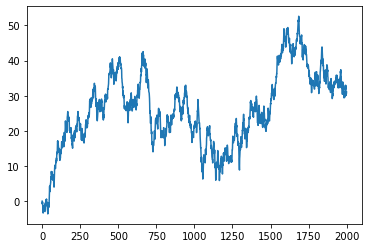

In [238]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.random import default_rng
rng = default_rng()


delta_t = 1
nsamples = 2000
nwalks = 100


def random_walk_basic(power_spec_density: float = 1, delta_t=1, nsamples=2000, rand_initial=True) -> np.ndarray:
    """
    Completes the basic random walk process

    Parameters:
    power_spec_density (float): power spectrum density of the random walk process
    delta_t (float): sample interval
    nsamples (int): the number of times to sample the random walk process
    rand_initial(bool): if True, start with a random number, if False start with 0

    Returns:
    np.ndarray of the completed process

    """
    # caclulate the variance qk
    qk = power_spec_density*delta_t

    # assign the initial value based on the input parameter
    n0 = 0 if not rand_initial else rng.normal(loc=0, scale=qk, size=1)

    # create and empty array
    walkarray = np.zeros(nsamples)
    # assign the initial condition
    walkarray[0] = n0

    # loop over the empty array calculating the values of the process
    for i in range(1, nsamples):
        walkarray[i] = walkarray[i-1] + \
            rng.normal(loc=0, scale=np.sqrt(qk), size=1)

    return walkarray


plt.plot(random_walk_basic(1, 1, 2000, rand_initial=True))


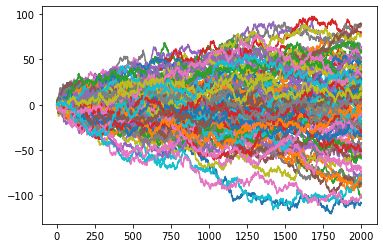

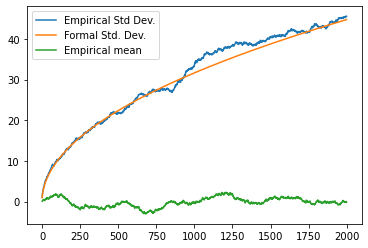

In [239]:
def realize_multiple_walks(n_walks: int, power_spec_density: float = 1, delta_t: float=1, nsamples: int=2000, rand_initial: bool=True):
    """
    runs a random walk process and prints the result

    Parameters:
    - nsamples = number of samples 
    - n_walks = number of times to run the random walk process
    - delta_t = sample interval
    - power_spec_density = power spectrum density
    - rand_intial = If true, start with a random initial condition. Default False

    Returns:
    None, but plots the result to the console
    """
    # calculate variance
    qk = power_spec_density*delta_t

    # initialize empty array to calculate the theoretical standard deviation
    theoretical_sd = np.zeros(nsamples)
    theoretical_sd[0] = qk

    # calculate theoretical standard deviation with a loop
    for i in range(1, nsamples):
        sd = np.sqrt((theoretical_sd[i-1]**2)+qk)
        theoretical_sd[i] = sd

    # create an empty array with dimensions (n_walks,nsamples)
    all_walk_results = np.zeros(
        shape=(n_walks, nsamples)
    )

    # realize the process multiple times
    for walk in range(n_walks):
        walkresults = random_walk_basic(
            power_spec_density, delta_t, nsamples, rand_initial)
        plt.plot(walkresults)
        all_walk_results[walk, :] = walkresults

    plt.show()

    emp_sd = all_walk_results.std(axis=0)
    emp_mean = all_walk_results.mean(axis=0)

    plt.clf()
    plt.plot(emp_sd, label='Empirical Std Dev.')
    plt.plot(theoretical_sd, label='Formal Std. Dev.')
    plt.plot(emp_mean, label='Empirical mean')
    plt.legend()


realize_multiple_walks(
    n_walks=100,
    power_spec_density=1,
    delta_t=1,
    nsamples=2000
)


### Question 1.b

> Take your code from question I.a, and modify it to repeat the simulation 20 times. This time you will only plot the empirical mean, empirical standard deviation and formal standard deviation of each simulation (so the plot contains 20 means and standard deviations). Include in your notebook 
> - the resulting plot, and, 
> - your conclusions on the empirical mean, empirical standard deviations and formal standard deviation.

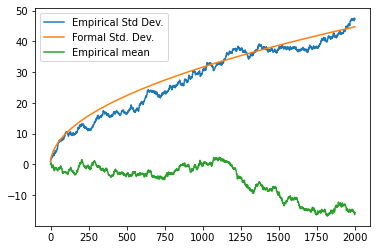

In [248]:
def one_b_multiple_walks(n_walks, power_spec_density: float = 1, delta_t=1, nsamples=2000, rand_initial=True):
    """ runs a random walk simulation, with a number of samples nsamples, n_walks times, and plots the result and the"""
    qk = power_spec_density*delta_t
    theoretical_sd = np.zeros(nsamples)
    theoretical_sd[0] = qk

    for i in range(1, nsamples):
        sd = np.sqrt((theoretical_sd[i-1]**2)+qk)
        theoretical_sd[i] = sd

    all_walk_results = np.zeros((n_walks, nsamples))

    for walk in range(n_walks):
        all_walk_results[walk, :] = random_walk_basic(
            power_spec_density, delta_t, nsamples, rand_initial)

    emp_sd = all_walk_results.std(axis=0)
    emp_mean = all_walk_results.mean(axis=0)
    plt.clf()
    plt.plot(emp_sd, label='Empirical Std Dev.')
    plt.plot(theoretical_sd, label='Formal Std. Dev.')
    plt.plot(emp_mean, label='Empirical mean')
    plt.legend()


one_b_multiple_walks(n_walks=20, power_spec_density=1,
                     delta_t=1, nsamples=2000)


*Enter here your conclusions using markdown*

### Question I.c

> A sequence is said to be wide-sense stationary when the mean and variance do not change with time. Is the random walk process  x_k wide-sense stationary? 

*Your answer using markdown*

## Part II - First order Gauss-Markov process

> A first order Gauss-Markov process is an example of a colored noise process. The first order Gauss-Markov process is a special case of an auto-regressive, or, AR(1) process. The first order Gauss-Markov process is generated using the following recursive formula
>
> $x_k = e^{-\beta \Delta t} x_{k-1} + w_k \ \ \ \ \ \ \ \ w_k \sim N(0,q_k = \frac{q}{2\beta} (1 - e^{-2 \beta \Delta t} ))$
> 
> with $w_k$ normal distributed Gaussian noise with variance $q_k = \frac{q}{2\beta} (1 - e^{-2 \beta \Delta t})$  and with 𝑞 the power spectral density of the underlying *white noise* process . 
> 
> The series $x_k$ is wide sense stationary and describes an exponentially correlated noise process (colored noise): the standard deviation $\sigma_{x_k}$ of $x_k$ is equal to $\sqrt{q/2\beta}$  (verify this yourself) and the correlation period is $T=1/\beta$.  
> 
> The standard deviation for the initial condition $x_0$ is $\sqrt{q/2\beta}$, the same as the standard deviation for any $x_k$, which makes sense because the process is wide sense stationary. 
> 
> Usually we do *not* select values for $q$ and $\beta$, but compute these values from a *chosen* value for the standard deviation $\sigma_{x_k} = \sigma_x$ (constant in time)  and the *chosen* correlation length $T$ for the time series $x_k$, and then  compute $q$ and $\beta$ using the equations $\beta = \frac{1}{T}$ and $q = 2 \beta \sigma_x^2$.  

### Question II.a

> Generate a first order Gauss-Markov sequence with sample interval $\Delta t = 1$ (s), a length of $N=2000$, correlation period $T=100$ (s), and standard deviation $\sigma_x = 1$. Repeat this 30 times and plot all 30 realizations in a single plot. The plot should contain 
> - The 30 realizations of the Gauss-Markov sequence $x_k$  
> - The *formal* standard deviation $\sigma_{x_k}$ as function of time, computed using error propagation on the recursive formula
> - The *empirical* mean and standard deviation of $x_k$ as function of time (using the functions mean and std) 
>
> Hint: for visual appearance, plot instead of the formal and empirical standard deviations, the boundaries of the 95\% reliability interval $-2 \sigma_{x_k}$ and $+2 \sigma_{x_k}$.

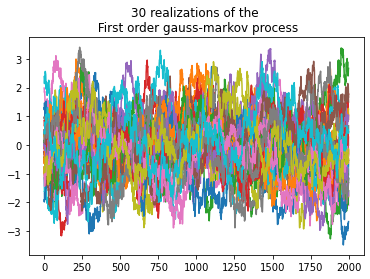

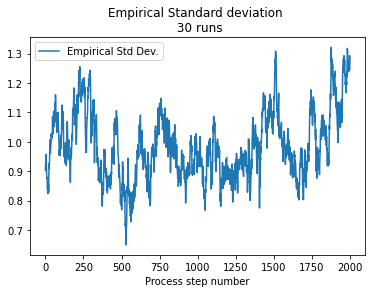

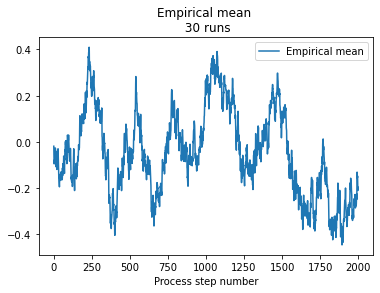

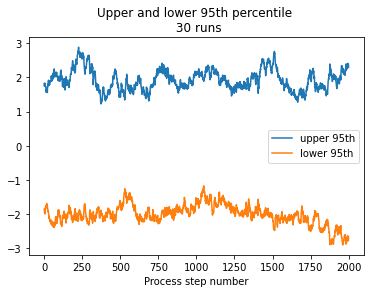

In [241]:
def plot_mean_std_dev(inputarray: np.ndarray):
    """ 
    Function that takes an ndarray and calculates the standard deviation and mean across the columns. 
    Plots all the realizations and the mean, standard, deviation, and 95th percentile bounds

    Parameters:
    inputarray(np.ndarray): the input array of multiple realizations of a FOGMP process 

    Returns:
    None, plots output to console
    """
    # first plot all the realizations.
    #plt.subplot(2,2,1)
    plt.plot(
        inputarray.transpose()  # the array must be transposed to match pyplot default syntax
    )
    plt.title(
        f'{inputarray.shape[0]} realizations of the \n First order gauss-markov process')
    plt.show()  # ensure the result prints to the notebook output

    # find the mean and standard deviation
    # need to use axis = 0 to avoid flattening the array
    emp_sd = inputarray.std(axis=0)
    emp_mean = inputarray.mean(axis=0)

    # find a 1xN array of the upper and lower 95 percentile
    upper_95 = emp_mean + 2*emp_sd
    lower_95 = emp_mean - 2*emp_sd

    # clear the figure, make a new plot, add a legend, and show it
    plt.clf()
    plt.plot(emp_sd, label='Empirical Std Dev.')
    plt.title(f'Empirical Standard deviation \n {inputarray.shape[0]} runs')
    plt.xlabel('Process step number')
    plt.legend()
    plt.show()

    # clear the figure, make a new plot, add a legend, and show it
    plt.clf()
    plt.plot(emp_mean, label='Empirical mean')
    plt.title(f'Empirical mean \n {inputarray.shape[0]} runs')
    plt.xlabel('Process step number')
    plt.legend()
    plt.show()

    # clear the figure, plot the upper and lower, add the legend, and show it
    plt.clf()
    plt.title(f'Upper and lower 95th percentile \n {inputarray.shape[0]} runs')
    plt.plot(upper_95, label='upper 95th')
    plt.plot(lower_95, label='lower 95th')
    plt.xlabel('Process step number')
    plt.legend()
    plt.show()

    # not really required
    return None


def fogmp(delta_t: float = 1, nsamples: int = 2000, T: float = 100, std_dev: float = 1) -> np.ndarray:
    """
    Calculate the first order gauss-markov process series, plot each one, and return the final series

    Parameters:
    delta_t (float): the sample interval in seconds
    nsamples (int): the number of samples
    T (float): the correlation period
    std_dev (float): the standard deviation of the underlying process

    Returns:
    np.ndarray of the single process
    """
    # create an empty array
    x = np.zeros(nsamples)

    # calculate the some of the intermediate values required for the series
    β = 1/T  # autocorrelation period
    q = 2*β*std_dev**2  # power spectral density of the process

    # calculate the variance of the gaussian noise
    qk = (q/(2*β))*(1-np.exp(-2*β*delta_t))

    # create an array of random numbers using the values calculated above
    wk = rng.normal(loc=0, scale=np.sqrt(qk), size=nsamples)

    # initialize array
    x[0] = rng.normal(loc=0, scale=np.sqrt(q/(2*β)), size=1)

    # loop over the array to calculate the series
    for k in range(1, nsamples):
        x[k] = np.exp(-β*delta_t)*x[k-1] + wk[k]

    # return the series
    return x


fogmp()


def run_multiple_fogmp(nruns: int, delta_t: float = 1, nsamples: int = 2000, T: float = 100, std_dev: float = 1) -> np.ndarray:
    """
    Run the process multiple times. Default parameters are based on the values in the assignment. 

    Parameters:
    nruns: how many times to run the process 
    delta_t (float): the sample interval in seconds
    nsamples (int): the number of
    T (float): the correlation period
    std_dev (float): the standard deviation of the underlying process

    Returns: 
    ndarray of the resulting realizations
    """
    # create an empty array to hold the each run of the first order gauss markov process.
    x_array = np.zeros((nruns, nsamples))

    # run the fogmp() process nruns times
    for run in range(nruns):
        x_array[run, :] = fogmp(delta_t, nsamples, T, std_dev)

    # show the changing in mean and standard deviation over time
    return x_array


plot_mean_std_dev(
    run_multiple_fogmp(30)
)


### Question II.b

> The *formal* standard deviation $\sigma_{x_k}$, that you computed using error propagation on the recursive formula, should be constant, which is what we expect for a process that is wide-sense stationary. Actually it was one of our input parameters $\sigma_x = 1$, so it should be. The question is, is the process you simulated actually wide-sense stationary? 
To verify you are asked to
> - If you haven’t done so already, compute the formal variance $\sigma_{x_k}$ using error propagation on the recursion formula (as you did with the random-walk process). You should again get a constant, but do you?
> - Increase the number of realisations to obtain a more precise estimate of the *empirical* standard deviation. Does it converge to the *formal* standard deviation $\sigma_{x_k}$ computed from the recursion formula?
>
> When there are deviations these probably occur at the start of the simulation, and are related to the way you initialized the initial values $x_0$. Please explain how you initialized the sequence and what this means for the wide-sense stationarity of the process.  

> The *formal* standard deviation $\sigma_{x_k}$ of the random walk variable $x_k$ can be computed recursively using error propagation, with the recursive formula
>
> $\sigma_{x_k}^2 = \sigma_{x_{k-1}}^2  + q_k$
>

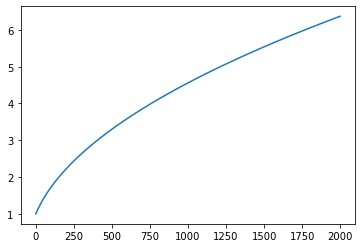

In [242]:
# compute formal variance using recursion formula,
# if you have already done this, simply leave this cell as is
def fogmp_formal_variance(
    delta_t: float = 1,
    nsamples: int = 2000,
    T: float = 100,
    std_dev: float = 1
) -> None:
    """
    Computes the formal error propagation for the 
    first order gauss-markov process

    Parameters:
    delta_t (float): the sample interval in seconds
    nsamples (int): the number of samples
    T (float): the correlation period
    std_dev (float): the standard deviation of the underlying process

    Returns: 
    None, plot to the output console
    """
    # create an empty array
    x = np.zeros(nsamples)

    # calculate the some of the intermediate values 
    # required for the series
    β = 1/T  # autocorrelation period
    q = 2*β*std_dev**2  # power spectral density of the process

    # calculate the variance of the gaussian noise
    qk = (q/(2*β))*(1-np.exp(-2*β*delta_t))
    sigma = np.sqrt(q/(2*β))

    # create the empty arrary to hold the results
    fm_st_dev = np.zeros(shape=nsamples)
    # initialize the array with the first standard deviation value
    fm_st_dev[0] = sigma
    # loop over the rest of the values in the array
    for i in range(1, nsamples):
        fm_st_dev[i] = np.sqrt(fm_st_dev[i-1]**2+qk)

    plt.plot(fm_st_dev)


fogmp_formal_variance()


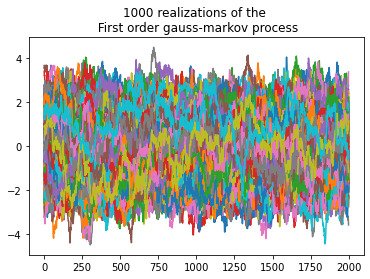

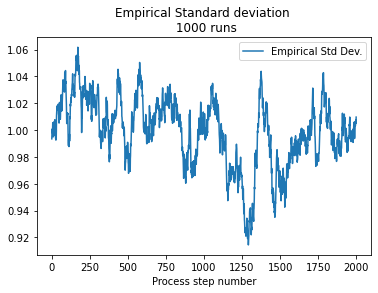

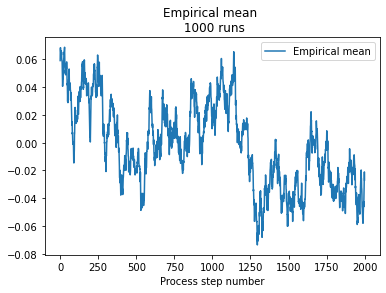

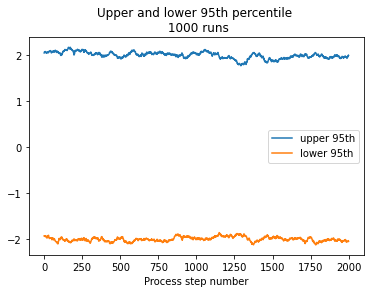

In [243]:
# run the code again using more realisations (here it comes in handy if you have the basic functionality in functions)
plot_mean_std_dev(
    run_multiple_fogmp(1000)
)


*Please explain how you initialized the sequence and what this means for the wide-sense stationarity, using markdown*

### Question II.c 

> Rewrite the code of II.a and II.b into one or more functions (if you haven’t done so already). The core function should return the empirical mean and standard deviation, formal standard deviation and a matrix with the realisations. The function(s) should have well defined inputs and outputs, and include a description on how to use each  function (preferably using Python documentation style).  Use the functions to generate the output of II.a and II.b. Of course, you may use the functions also for II.a and II.b, but we have listed this here as a separate item to emphasize that in II.c  you receive a grade depending on how well the coding is done.

In [244]:
# Place holder for any new code, simply leave this cell as is if you have defined the functions in II.a and II.b


### Question II.d

> Create a new plot with seven samples of a Gauss-Markov series (one realization only for each), each  using different values for $T$, with $T=1$, $T=10$, $T=50$, $T=100$, $T=500$, $T=1000$ and $T=5000$ (s), using the function of II.c (but the actual plotting does not have to be a function). For clarity, offset(shift) each realization in the vertical direction, so that the individual series do not overlap, or use subplots. There are different ways to organize the plots, but the idea is that you produce a plot that effectively shows the effect of using different values for $T$.

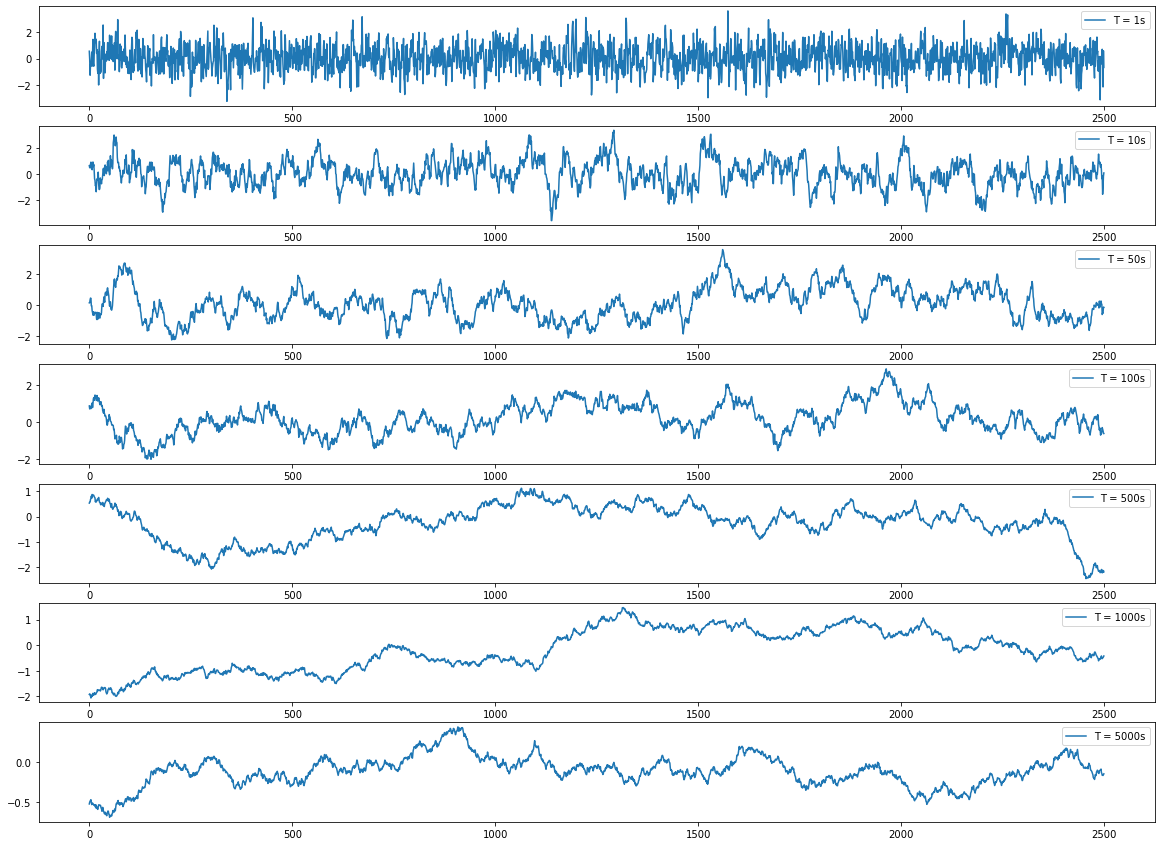

<Figure size 432x288 with 0 Axes>

In [245]:
T_values = [1, 10, 50, 100, 500, 1000, 5000]

plt.figure(figsize=(20, 15))

for i, T in enumerate(T_values):
    # python is zero-indexed so add 1 to match with subplot indexing in pyplot
    plt.subplot(len(T_values), 1, i+1)
    # run the first order gauss markov process with the given value of T, and the default value of everything else
    process_result = fogmp(T=T, nsamples=2500)
    # plot the results
    plt.plot(process_result, label=f'T = {T}s')
    plt.legend()

plt.show()
plt.clf()


## Part III - Standard deviation of the slope (rate of change)

> In this part you will fit a line to each realization and compute the offset and slope.  The expected true values for the offset and slope are both zero, but of course, the estimated empirical values are not equal to zero. 
> 
> You are asked to make a table with the mean and standard deviation of the estimated slope parameter for each of the seven cases of question II.d. To be able to compute the standard deviation of the slope you have to use multiple realizations, unlike question II.d, which plots only a single realization, estimate the slope for each realization, and then compute the mean and standard deviation. Repeat this for every case of II.d .
> 
> What do you conclude from this simulation? For comparison you may also include white noise and random walk processes in this simulation. Please mention your conclusion in your report or notebook.

In [246]:
# Enter your code here, and run it, to show the table with the mean and standard deviation of the estimated slope for each case
import pandas as pd
T_values = [1, 10, 50, 100, 500, 1000, 5000]

parameters_dict = {}  # initialize an empty dictionary outside the loop

for T in T_values:
    # run the first order gauss markov process 100 times with the given value of T, and the default value of everything else
    process_result = run_multiple_fogmp(nruns=100, T=T, nsamples=2000)
    # create a np array that is an integer range
    x = np.arange(process_result.shape[1])
    # fit a degree 1 polynomial to each of the 30 runs, after transposing the input matrix so that it fits the input required to polyfit
    fitted_linear = np.polyfit(x, process_result.transpose(), deg=1)

    # calculate the standard deviation of the two values and unpack into two variables
    slp_std, offset_std = fitted_linear.std(axis=1)
    # calculate the mean and unpack into two variables
    slope_mean, offset_mean = fitted_linear.mean(axis=1)

    # set the dictionary value to the dictionary
    parameters_dict[T] = [slope_mean, slp_std, offset_mean, offset_std]


In [247]:
# convert the parameters into a dataframe for easy data manipulation
df = pd.DataFrame.from_dict(
    data=parameters_dict,
    orient='index',
    columns=[
        'Slope Mean',
        'Slope Std. Dev.',
        'Intercept Mean',
        'Intercept Std. Dev.',
    ],
)

df


,Slope Mean,Slope Std. Dev.,Intercept Mean,Intercept Std. Dev.
1,-7.016035e-07,0.000049,-0.000353,0.058869
10,2.285958e-05,0.000176,-0.041475,0.201862
50,2.073728e-05,0.000404,0.001901,0.470250
100,-7.413993e-06,0.000537,0.011900,0.584517
500,2.925463e-05,0.000810,0.009352,0.904476
1000,5.388639e-05,0.000716,-0.065168,0.871210
5000,3.797267e-05,0.000432,0.007020,1.047111


*Your conclusions from this simulation in markdown. For comparison you may also include white noise and random walk processes.*

[End of this Jupyter notebook]